In [26]:
import pandas as pd

austin = pd.read_csv('Austin_final-laps19-24.csv')

pd.options.display.max_columns = None  # Show all columns
pd.options.display.expand_frame_repr = False  # Disable line wrapping

In [27]:
austin.columns

Index(['Driver', 'DriverNumber', 'FormattedLapTime', 'LapNumber', 'Stint',
       'TyreLife', 'Compound', 'Team', 'AirTemp', 'Humidity', 'Pressure',
       'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed'],
      dtype='object')

In [28]:
print(austin.head(10))

  Driver  DriverNumber FormattedLapTime  LapNumber  Stint  TyreLife Compound        Team  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  WindDirection  WindSpeed
0    GAS            10         1:44:253        2.0    1.0       5.0     SOFT  Toro Rosso     21.4      23.9    1002.0     False       28.9            171        2.5
1    GAS            10         1:43:246        3.0    1.0       6.0     SOFT  Toro Rosso     21.5      24.7    1002.0     False       28.9            151        3.0
2    GAS            10         1:42:794        4.0    1.0       7.0     SOFT  Toro Rosso     21.1      24.8    1001.8     False       29.0            268        1.6
3    GAS            10         1:42:481        5.0    1.0       8.0     SOFT  Toro Rosso     21.2      25.0    1001.7     False       29.0             54        1.4
4    GAS            10         1:42:402        6.0    1.0       9.0     SOFT  Toro Rosso     21.4      24.9    1001.7     False       29.1            154        0.7
5    GAS  

In [29]:
compound_mapping = {'SOFT': 0, 'MEDIUM': 1, 'HARD': 2}

# Apply the mapping to the 'Compound' column
austin['CompoundNum'] = austin['Compound'].map(compound_mapping)

print(austin.head(10))

  Driver  DriverNumber FormattedLapTime  LapNumber  Stint  TyreLife Compound        Team  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  WindDirection  WindSpeed  CompoundNum
0    GAS            10         1:44:253        2.0    1.0       5.0     SOFT  Toro Rosso     21.4      23.9    1002.0     False       28.9            171        2.5            0
1    GAS            10         1:43:246        3.0    1.0       6.0     SOFT  Toro Rosso     21.5      24.7    1002.0     False       28.9            151        3.0            0
2    GAS            10         1:42:794        4.0    1.0       7.0     SOFT  Toro Rosso     21.1      24.8    1001.8     False       29.0            268        1.6            0
3    GAS            10         1:42:481        5.0    1.0       8.0     SOFT  Toro Rosso     21.2      25.0    1001.7     False       29.0             54        1.4            0
4    GAS            10         1:42:402        6.0    1.0       9.0     SOFT  Toro Rosso     21.4      24.9   

In [30]:
austin['Rainfall'] = austin['Rainfall'].astype(int)

print(austin.head(10))

  Driver  DriverNumber FormattedLapTime  LapNumber  Stint  TyreLife Compound        Team  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  WindDirection  WindSpeed  CompoundNum
0    GAS            10         1:44:253        2.0    1.0       5.0     SOFT  Toro Rosso     21.4      23.9    1002.0         0       28.9            171        2.5            0
1    GAS            10         1:43:246        3.0    1.0       6.0     SOFT  Toro Rosso     21.5      24.7    1002.0         0       28.9            151        3.0            0
2    GAS            10         1:42:794        4.0    1.0       7.0     SOFT  Toro Rosso     21.1      24.8    1001.8         0       29.0            268        1.6            0
3    GAS            10         1:42:481        5.0    1.0       8.0     SOFT  Toro Rosso     21.2      25.0    1001.7         0       29.0             54        1.4            0
4    GAS            10         1:42:402        6.0    1.0       9.0     SOFT  Toro Rosso     21.4      24.9   

In [31]:
def convert_to_seconds(lap_time):
    minutes, seconds, milliseconds = map(int, lap_time.split(":"))
    total_seconds = minutes * 60 + seconds + milliseconds / 1000
    return total_seconds

# Apply the conversion
austin['LapTimeSeconds'] = austin['FormattedLapTime'].apply(convert_to_seconds)

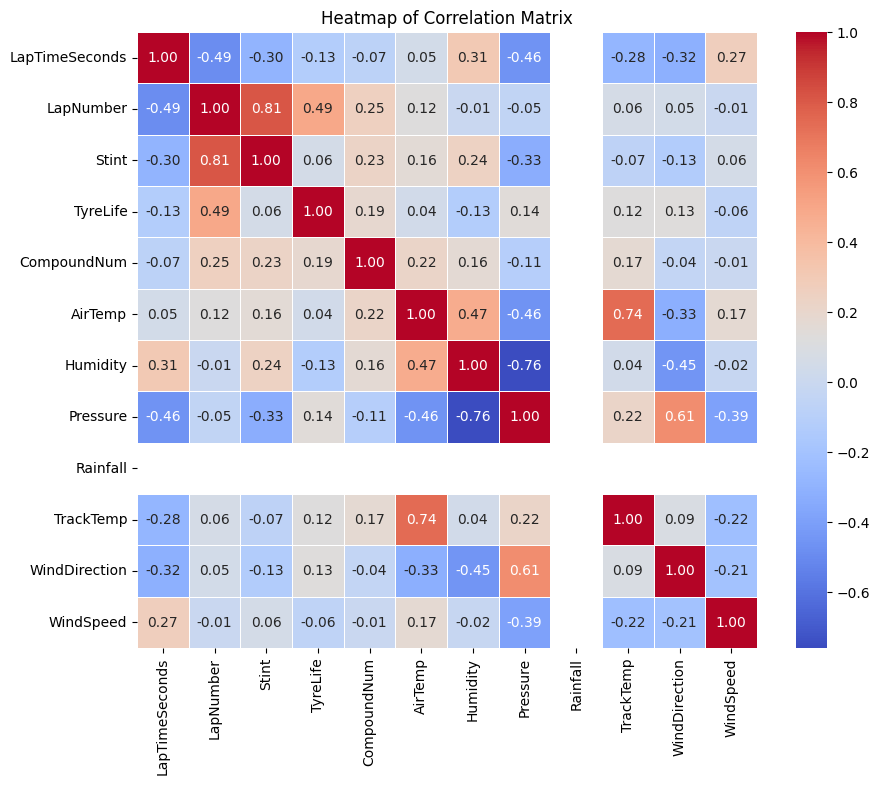

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

params = austin[['LapTimeSeconds', 'LapNumber', 'Stint','TyreLife', 'CompoundNum', 'AirTemp', 'Humidity', 'Pressure','Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed']]

corr_matrix = params.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the plot
plt.title("Heatmap of Correlation Matrix")
plt.show()

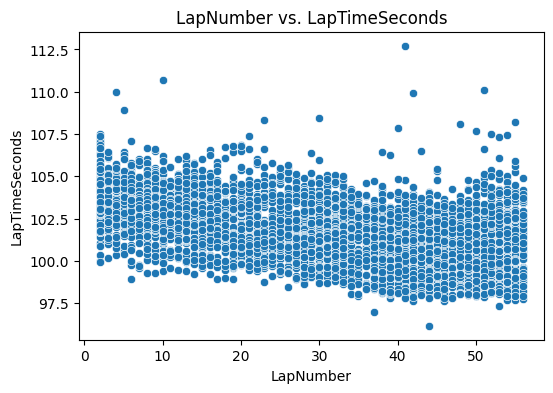

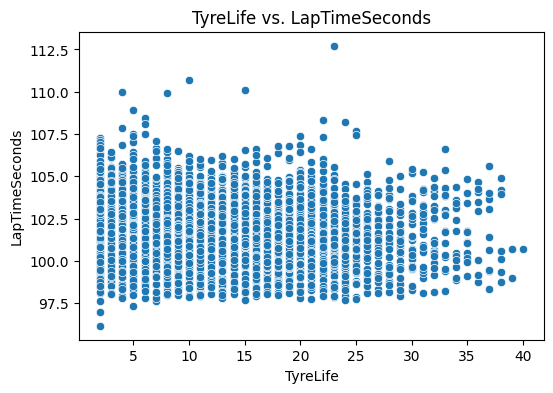

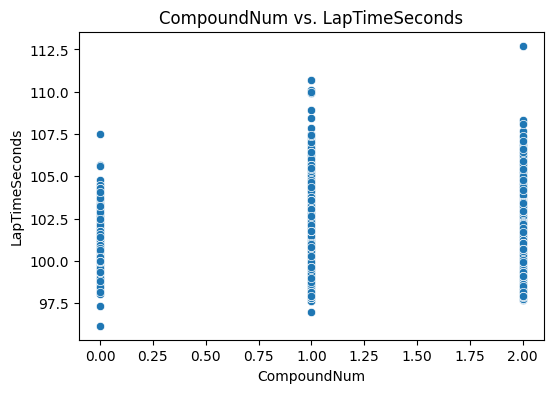

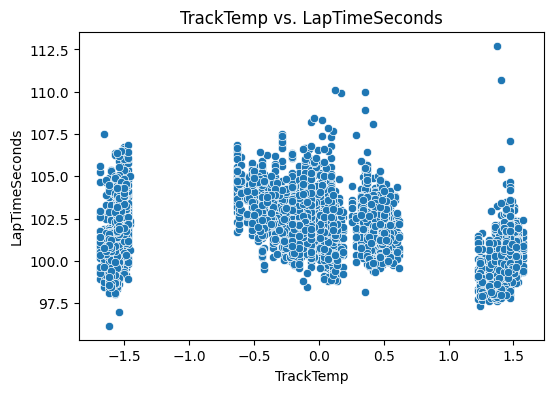

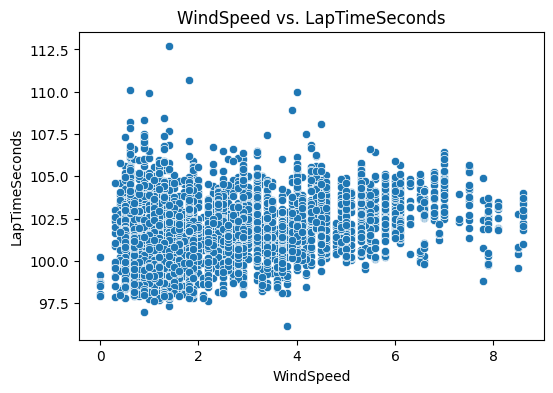

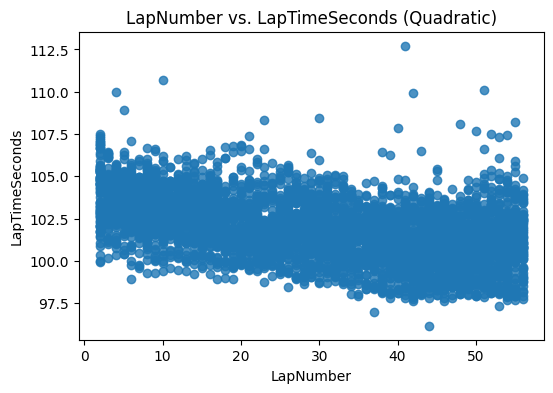

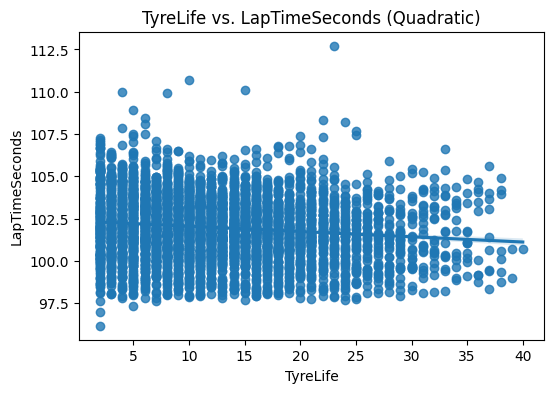

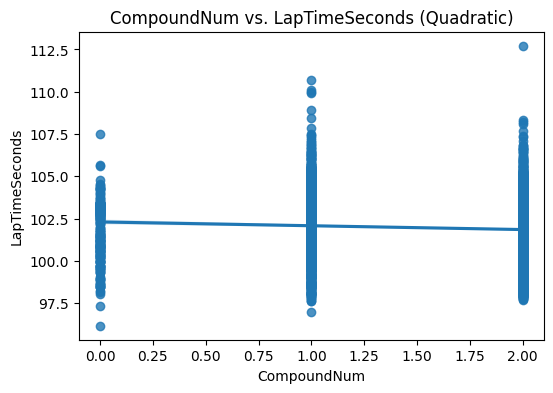

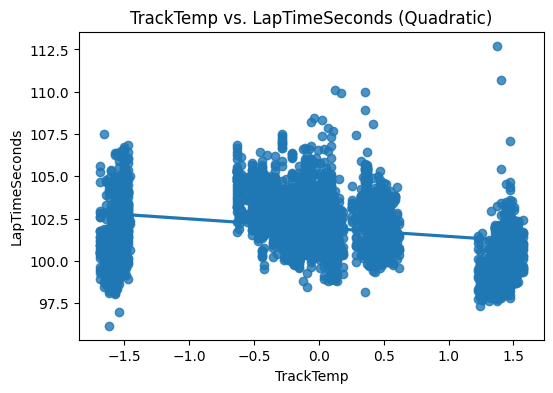

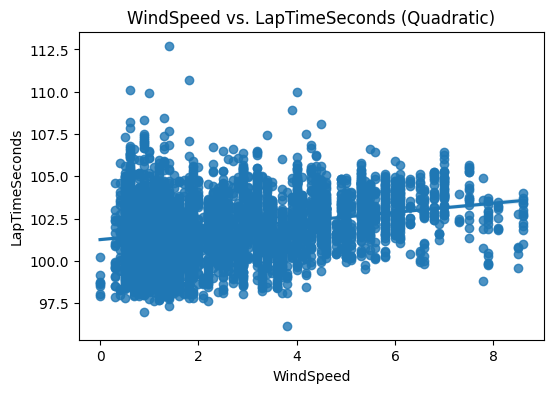

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for each feature against LapTimeSeconds
for feature in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=austin, x=feature, y='LapTimeSeconds')
    plt.title(f"{feature} vs. LapTimeSeconds")
    plt.show()

for feature in X.columns:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=austin, x=feature, y='LapTimeSeconds', order=1)
    plt.title(f"{feature} vs. LapTimeSeconds (Quadratic)")
    plt.show()

In [42]:
 y = austin['LapTimeSeconds']
X = austin[['LapNumber','TyreLife', 'CompoundNum', 'TrackTemp', 'WindSpeed', 'AirTemp', 'Humidity', 'Pressure']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.4106923357952132
R-squared: 0.5642321789849551


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

austin['TrackTemp'] = scaler.fit_transform(austin[['TrackTemp']])

print(austin.head(10))


  Driver  DriverNumber FormattedLapTime  LapNumber  Stint  TyreLife Compound        Team  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  WindDirection  WindSpeed  CompoundNum  LapTimeSeconds
0    GAS            10         1:44:253        2.0    1.0       5.0     SOFT  Toro Rosso     21.4      23.9    1002.0         0  -1.570668            171        2.5            0         104.253
1    GAS            10         1:43:246        3.0    1.0       6.0     SOFT  Toro Rosso     21.5      24.7    1002.0         0  -1.570668            151        3.0            0         103.246
2    GAS            10         1:42:794        4.0    1.0       7.0     SOFT  Toro Rosso     21.1      24.8    1001.8         0  -1.554215            268        1.6            0         102.794
3    GAS            10         1:42:481        5.0    1.0       8.0     SOFT  Toro Rosso     21.2      25.0    1001.7         0  -1.554215             54        1.4            0         102.481
4    GAS            10        

In [36]:
y = austin['LapTimeSeconds']
X = austin[['LapNumber','TyreLife', 'CompoundNum', 'TrackTemp', 'WindSpeed']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.000969262237018
R-squared: 0.3818935616237109
